<a href="https://colab.research.google.com/github/mollyhealey3-stack/QNC-Tutorials/blob/main/Parametric_Correlation_Coefficient_9_24_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

1. Plot X vs Y. Do they look related?


Text(0, 0.5, 'Wing Length (cm)')

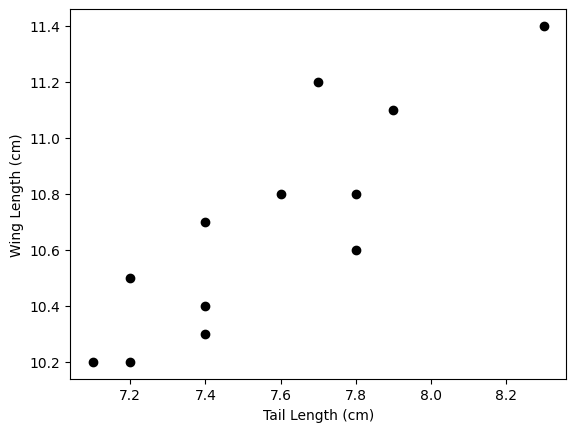

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2 ,7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

plt.plot(tail_length, wing_length, 'ko')
plt.xlabel('Tail Length (cm)')
plt.ylabel('Wing Length (cm)')

these two variables do appear to be correlated

##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [6]:
#calculated
n             = np.size(wing_length)
sample_mean_x = np.sum(wing_length)/n
sample_mean_y = np.sum(tail_length)/n
SSEX          = np.sum((wing_length - sample_mean_x) ** 2)
SSEY          = np.sum((tail_length - sample_mean_y) ** 2)
SCOVXY        = np.sum((wing_length - sample_mean_x)*(tail_length - sample_mean_y))
rXY           = SCOVXY/(np.sqrt(SSEX)*np.sqrt(SSEY))
rYX           = SCOVXY/(np.sqrt(SSEY)*np.sqrt(SSEX))

# Use corrcoef
corrcoef = np.corrcoef(wing_length, tail_length)

print(f'rXY={rXY:.4f} (calculated), {corrcoef[0,1]:.4f} (corrcoef)')
print(f'rYX={rYX:.4f} (calculated), {corrcoef[1,0]:.4f} (corrcoef)')

rXY=0.8704 (calculated), 0.8704 (corrcoef)
rYX=0.8704 (calculated), 0.8704 (corrcoef)


##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [8]:
import numpy as np

# Data
wing = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Sample size
n = len(wing)

# Correlation coefficient
r = np.corrcoef(wing, tail)[0, 1]

# Standard error of r
se_r = np.sqrt((1 - r**2) / (n - 2))

# 95% CI using Fisher z-transform
z = np.arctanh(r)  # Fisher transformation
se_z = 1 / np.sqrt(n - 3)
z_crit = 1.96  # for 95% CI
z_ci = [z - z_crit * se_z, z + z_crit * se_z]
r_ci = [np.tanh(z_ci[0]), np.tanh(z_ci[1])]

print("Correlation r =", r)
print("Standard error of r =", se_r)
print(f"95% CI for r = [{r_ci[0]:.3f}, {r_ci[1]:.3f}]")


Correlation r = 0.8703545613058227
Standard error of r = 0.15571863652567375
95% CI for r = [0.592, 0.963]


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [4]:
import numpy as np
from scipy import stats

# Data
wing = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

n = len(wing)

# Sample correlation
r = np.corrcoef(wing, tail)[0, 1]

# Test statistic
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
df = n - 2

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"Correlation r = {r:.3f}")
print(f"t-statistic = {t_stat:.3f}, df = {df}")
print(f"p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Result: Significant at the 0.05 level → reject H0.")
else:
    print("Result: Not significant at the 0.05 level → fail to reject H0.")

Correlation r = 0.870
t-statistic = 5.589, df = 10
p-value = 0.00023
Result: Significant at the 0.05 level → reject H0.


##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [5]:
import numpy as np
from scipy import stats as st

# Your sample correlation
r = 0.8703545613058227  # computed earlier
n = 12

# Fisher z-transform for your correlation
z = np.arctanh(r)

# Yale’s reported correlation
r_Yale = 0.75
z_Yale = 0.5 * np.log((1 + r_Yale) / (1 - r_Yale))

# Standard error of z
z_std = 1 / np.sqrt(n - 3)

# Test statistic
plambda = (z - z_Yale) / z_std

# Two-tailed p-value
prob2 = 2 * (1 - st.norm.cdf(abs(plambda)))

print(f"Test statistic = {plambda:.3f}")
print(f"p = {prob2:.4f} for H0: r = 0.75")


Test statistic = 1.085
p = 0.2780 for H0: r = 0.75


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [6]:
import numpy as np
from scipy import stats as st
from scipy.optimize import bisect

alpha = 0.05
r_true = 0.5
n_current = 12

def power_for_n(n, r=r_true, alpha=alpha):
    z_effect = np.arctanh(r)
    se_z = 1.0 / np.sqrt(n - 3)
    z_alpha = st.norm.ppf(1 - alpha/2)
    power = st.norm.cdf((z_effect / se_z) - z_alpha) + (1 - st.norm.cdf((z_effect / se_z) + z_alpha))
    return power

power_current = power_for_n(n_current)

# find n giving 80% power
target_power = 0.8
required_n = int(np.ceil(bisect(lambda x: power_for_n(x) - target_power, 4.1, 1000.0)))

print("Power at n=12:", power_current)
print("Required n for 80% power:", required_n)

Power at n=12: 0.3776573058282629
Required n for 80% power: 30
